In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [134]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [135]:
cwd = os.getcwd()
dataset = pd.read_csv(os.path.join(cwd, 'datasets/train.csv'))

# 1. Feature description
---
* survival	- Survival	(0 = No, 1 = Yes)
* pclass    - Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
* sex       - Sex	
* Age	    - Age in years	
* sibsp	    - # of siblings / spouses aboard the Titanic	
* parch	    - # of parents / children aboard the Titanic	
* ticket	- Ticket number	
* fare	    - Passenger fare	
* cabin	    - Cabin number	
* embarked	-Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)


In [136]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2. Exploratory Data Analysis(EDA)

## 2.1 Shape of the Dataset

In [137]:
dataset.shape

(891, 12)

## 2.2 Data types

In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> seems to have null values in `Age`, `Cabin` and `Embark`

## 2.3 Summary of Statistics

In [139]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [140]:
# survival rate
print('Survival rate: {:.2f}%'.format(len(dataset[dataset['Survived'] == 1]) / dataset.shape[0] *100))

Survival rate: 38.38%


## 2.4 Missing Data

In [141]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<AxesSubplot:>

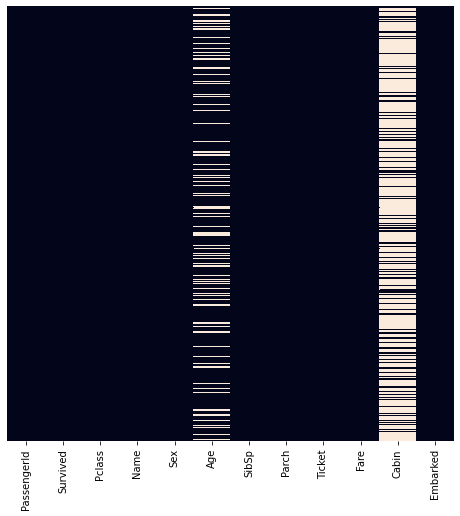

In [142]:
plt.figure(figsize=(8, 8))
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False)

> `Cabin` seems to have more than 20% of it's data missing. Missing values of `Embarked` is really low so can't detect on the plot

##### Let's see about the Age

In [143]:
age_missing_count = dataset['Age'].isna().sum()
print('Age is missing {} ({:.2f}%) records.'.format(age_missing_count, (age_missing_count/dataset.shape[0])*100))

Age is missing 177 (19.87%) records.


##### Let's see about the Cabin

In [144]:
cabin_missing_count = dataset['Cabin'].isna().sum()
print('Cabin is missing {} ({:.2f}%) records.'.format(cabin_missing_count, (cabin_missing_count/dataset.shape[0])*100))

Cabin is missing 687 (77.10%) records.


> **77.10%** of the data is missing from `Cabin` feature. It's better to drop it

##### Lets see about the Embarked

In [145]:
embarked_missing_count = dataset['Embarked'].isna().sum()
print('Embarked missing count: {}'.format(embarked_missing_count))

Embarked missing count: 2


> Only two records are missing. 

## 2.5 Categorical Data Analysis

In [146]:
columns = ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']

for column in columns:
    print('{}: {}'.format(column, dataset[column].unique()))

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C

**Let's see about Cabin feature**

In [148]:
dataset['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

> `Cabin` feature has many categories

In [147]:
dataset['Cabin'].isna().sum()

687

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Cabin'>

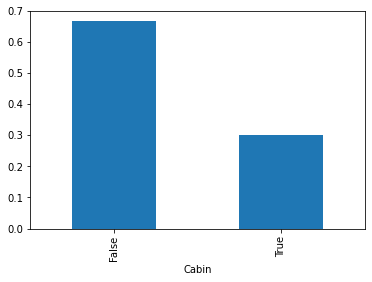

In [152]:
print(dataset['Survived'].groupby(dataset['Cabin'].isna()).mean())
dataset['Survived'].groupby(dataset['Cabin'].isna()).mean().plot(kind='bar')

##### Let's see about `Embarked` feature

In [15]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

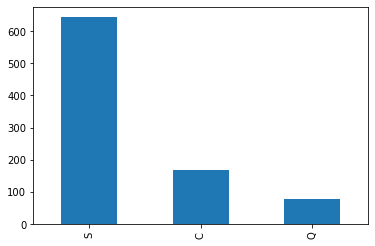

In [16]:
dataset['Embarked'].value_counts().plot(kind='bar')

> Majority of the Embarked are `S` category

In [17]:
dataset['Survived'].groupby(dataset['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked'>

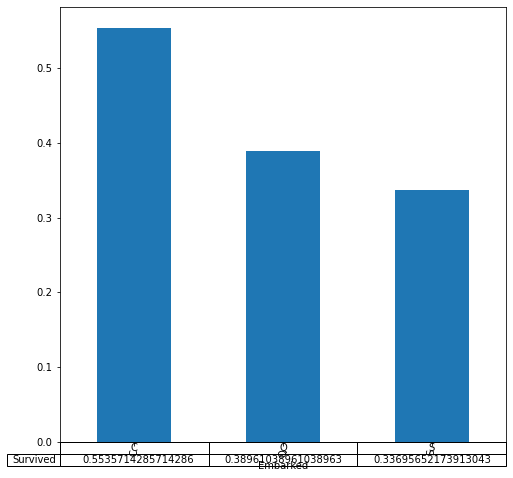

In [18]:
plt.figure(figsize=(8, 8))
dataset['Survived'].groupby(dataset['Embarked']).mean().plot(kind='bar', table=True)

##### Let's see about `Sex` feature

In [19]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Sex'>

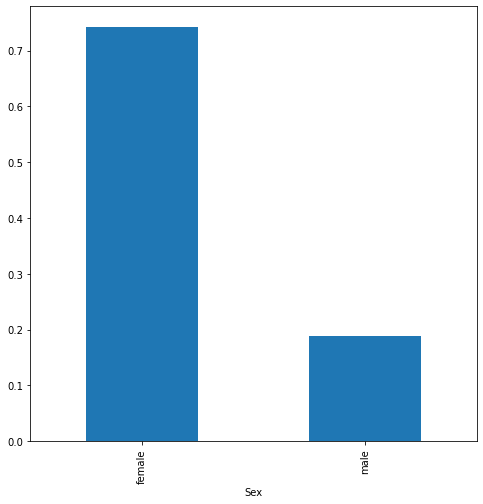

In [20]:
plt.figure(figsize=(8, 8))

print(dataset['Survived'].groupby(dataset['Sex']).mean())
dataset['Survived'].groupby(dataset['Sex']).mean().plot(kind='bar')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


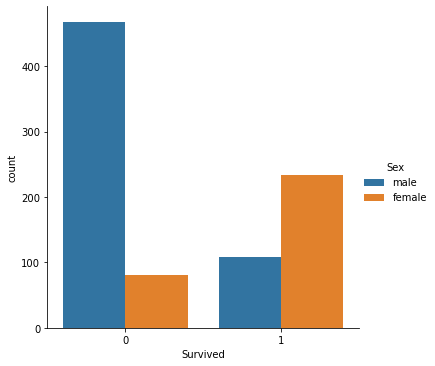

In [21]:
sns.factorplot('Survived', data=dataset, kind='count', hue='Sex')

> Majority of survivors are female and majority that didn't make are males. Let's see is this true for all classes

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


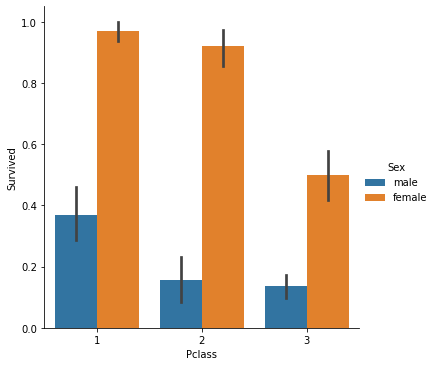

In [22]:
sns.catplot('Pclass', 'Survived', data=dataset, hue='Sex', kind='bar')

> It seems the above mentioned is true for all classes

#### Let's see about the Ticket column

In [23]:
dataset['Ticket'].duplicated().sum()

210

In [24]:
dataset['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
347088               6
3101295              6
                    ..
4138                 1
349246               1
383121               1
A/5 21174            1
STON/O 2. 3101288    1
Name: Ticket, Length: 681, dtype: int64

In [25]:
dataset[dataset['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


> It seems `Ticket` feature contains data about families, marriage status, etc.

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


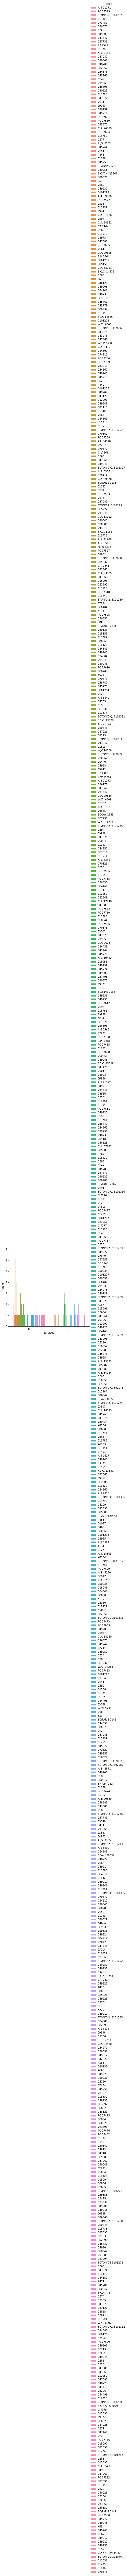

In [26]:
sns.factorplot('Survived', data=dataset, kind='count', hue='Ticket')

In [27]:
print('Number of ticket categories:', len(dataset['Ticket'].unique()))

Number of ticket categories: 681


> Seems to have duplicates and too much categories

#####  Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


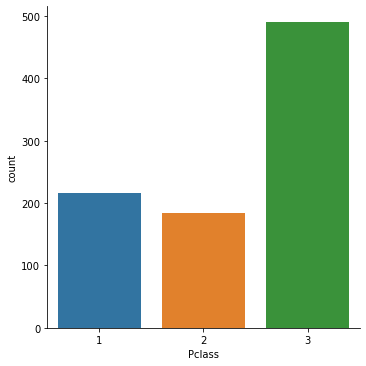

In [41]:
# how many are there in each class?
print(dataset['Pclass'].value_counts())
sns.catplot('Pclass', data=dataset, kind='count')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Pclass'>

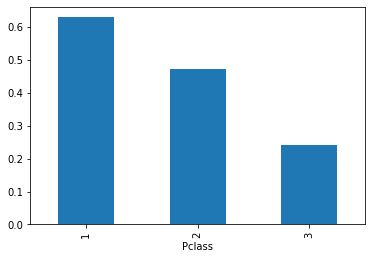

In [131]:
print(dataset['Survived'].groupby(dataset['Pclass']).mean())
dataset['Survived'].groupby(dataset['Pclass']).mean().plot(kind='bar')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


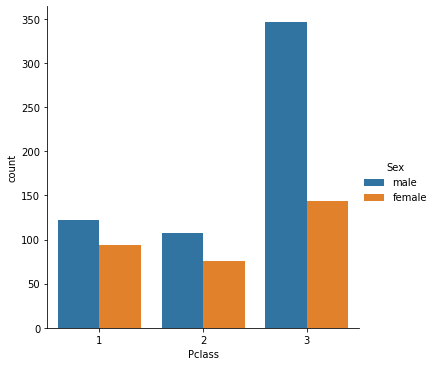

In [42]:
# How is the gender distribution among class
sns.catplot('Pclass', data=dataset, hue='Sex', kind='count')

> It seems 3rd class had more male passengers

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


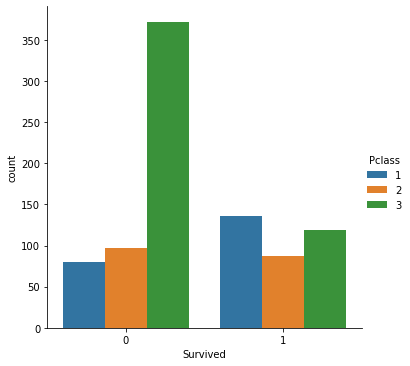

In [43]:
# let's see survival count in each class
sns.catplot('Survived', data=dataset, hue='Pclass', kind='count')

> 3rd class suffered the most. Let's see genderwise survival

In [44]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.6 Numerical Data Analysis

##### Let's see about Age

In [29]:
age_missing = dataset['Age'].isna().sum()

print('Age missing record count: {}({:.2f}%)'.format(age_missing,  (age_missing/dataset.shape[0])*100))

Age missing record count: 177(19.87%)


> Missing age values cannot remove because other columns of 177 rows can contain valuble info. And age can be predicted by considering other features of the dataset so instead of using any basic imputation method more logical method can be used. **Needs to further study**

In [30]:
corr = dataset.corr()

<AxesSubplot:>

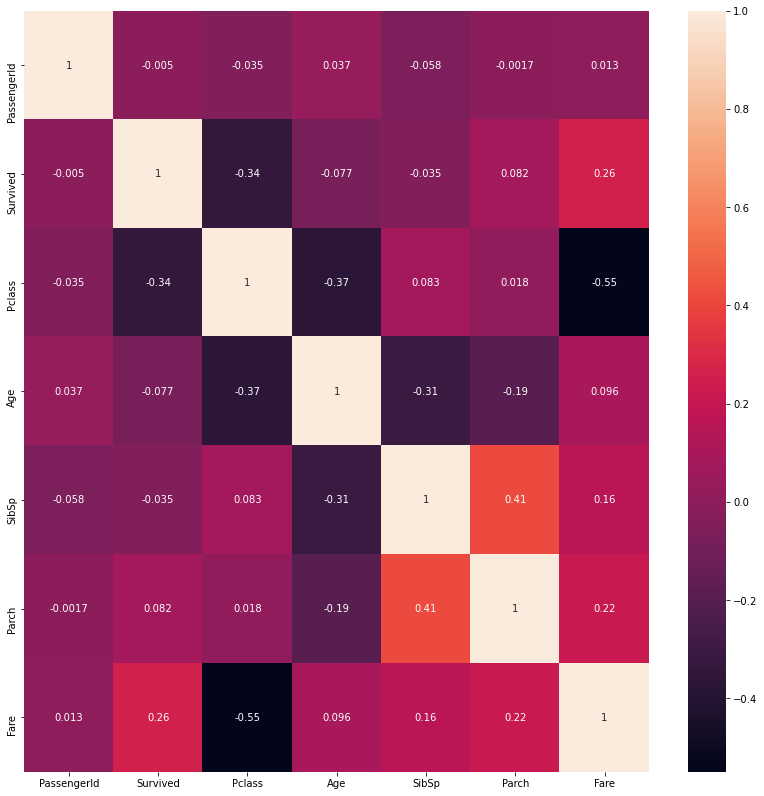

In [31]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64
Age missing : 0.2937853107344633 survived
Age missing : 0.4061624649859944 not survived


Text(0.5, 0, 'Survived')

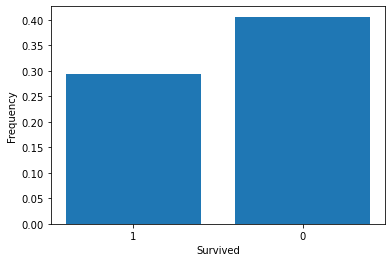

In [167]:
print(dataset['Survived'].groupby(dataset['Age'].isna()).mean())
age_missing_survived = dataset['Survived'].groupby(dataset['Age'].isna()).mean()[1]
age_missing_not_survived = dataset['Survived'].groupby(dataset['Age'].isna()).mean()[0]
print('Age missing : {} survived'.format(age_missing_survived))
print("Age missing : {} not survived".format(age_missing_not_survived))

plt.bar(['1', '0'], [age_missing_survived, age_missing_not_survived])
plt.ylabel('Frequency')
plt.xlabel('Survived')

> Most of the age missing did not survived. It's more than twice the size that survived

##### Let's see how age is distributed

<AxesSubplot:xlabel='Age', ylabel='Density'>

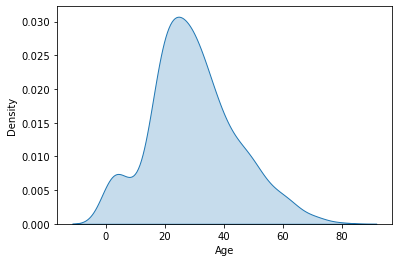

In [33]:
sns.kdeplot(dataset['Age'], shade=True)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

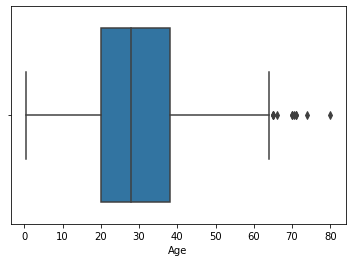

In [34]:
sns.boxplot(dataset['Age'])

> Seems to follow a normal distribution but there're outliers(>65), meaning that there were less people that age is > 65

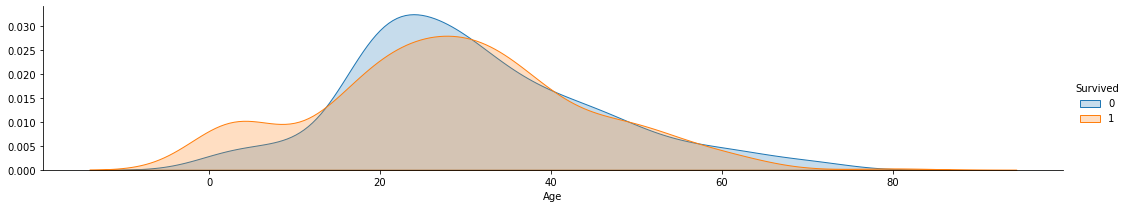

In [35]:
survival_wise = sns.FacetGrid(dataset, hue='Survived', aspect=5)
survival_wise.map(sns.kdeplot, 'Age', shade=True)
survival_wise.add_legend()

##### Let's see genderwise age distribution

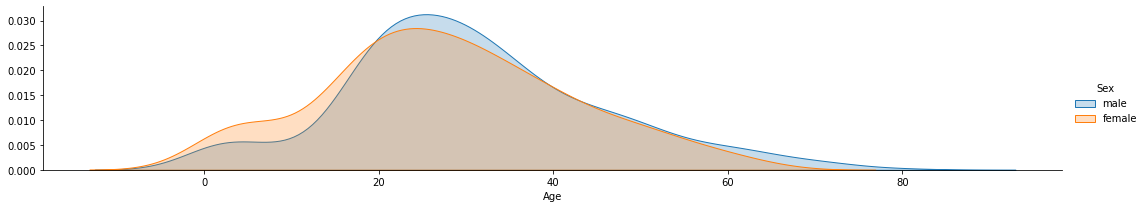

In [36]:
# Multi-plot grid for plotting conditional relationships.

gender_wise = sns.FacetGrid(dataset, hue='Sex', aspect=5)
gender_wise.map(sns.kdeplot, 'Age', shade=True)
gender_wise.add_legend()

##### Let's see Passenger class wise disribution

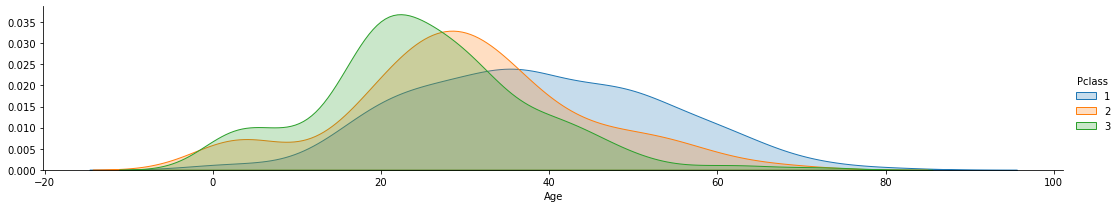

In [37]:
class_wise = sns.FacetGrid(dataset, hue='Pclass', aspect=5)
class_wise.map(sns.kdeplot, 'Age', shade=True)
class_wise.add_legend()

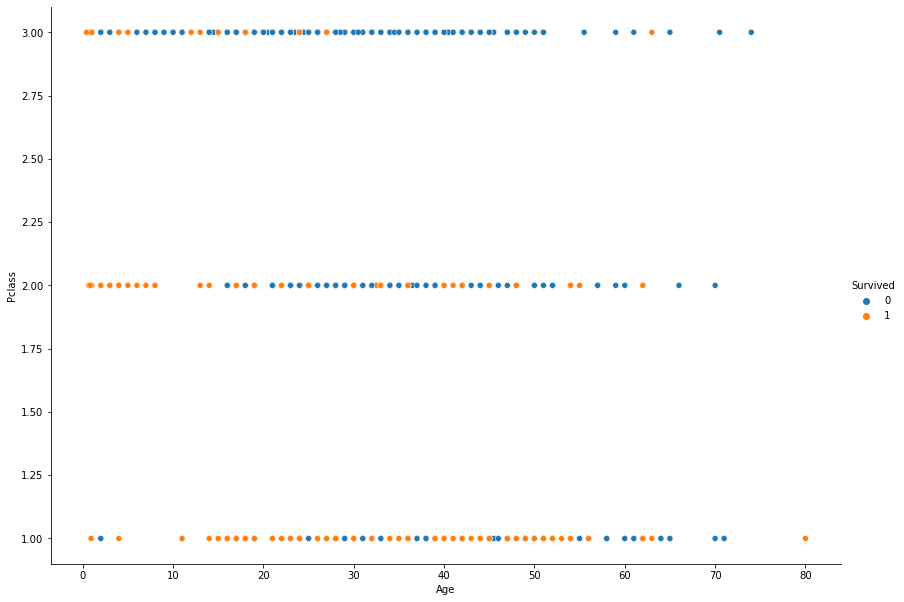

In [38]:
sns.relplot(x="Age", y="Pclass", hue="Survived",data=dataset, height=8.27, aspect=11.7/8.27)

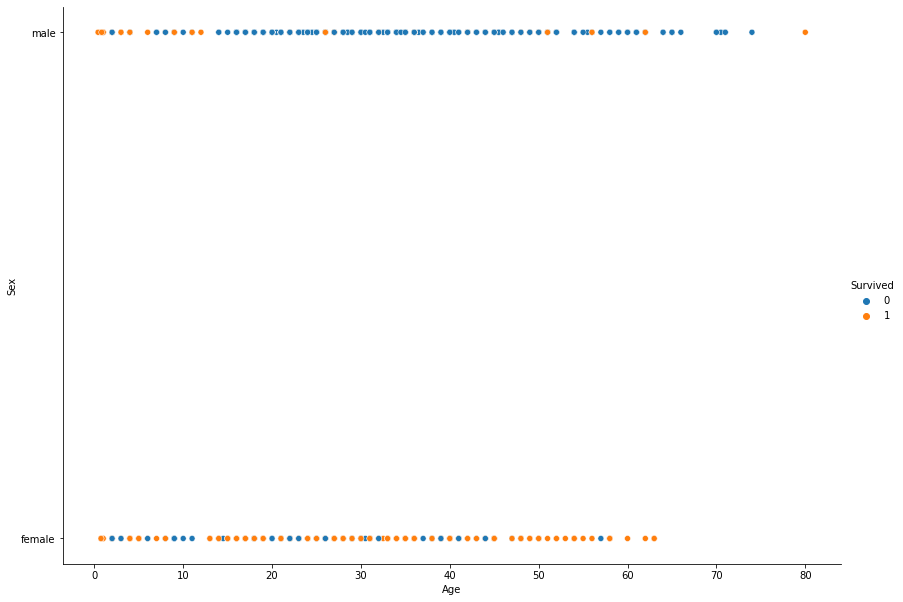

In [39]:
sns.relplot(x="Age", y="Sex", hue="Survived",data=dataset, height=8.27, aspect=11.7/8.27)

**Let's see Age range wise distribution**

In [40]:
# qcut will have bins with equal number of records in each
dataset['Survived'].groupby(pd.qcut(dataset['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

> It seems more data will be there when cut into 10 and 20 is too much

**Summary**
> - By considering all the graphs the majority of passengers are in **20-40** age limit and most survivours are from that range.
> - Seems **first class** has more survivers.
> - It seems more deaths are from male passengers in age range 20-45
> - **It will be better to devide into age ranges insted of just ages** 

#### Let's check on SibSp(# of sibilings/spouse)

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

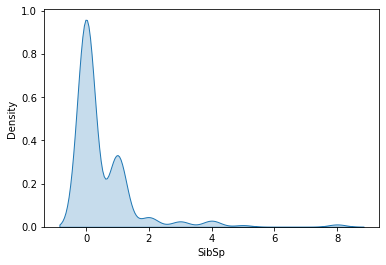

In [45]:
sns.kdeplot(dataset['SibSp'], shade=True)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


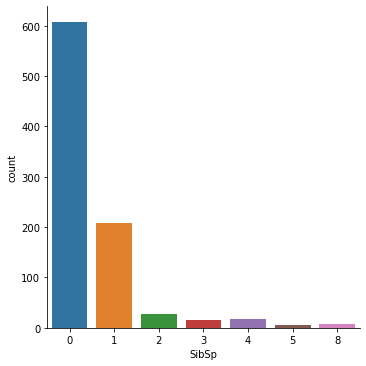

In [46]:
print(dataset['SibSp'].value_counts())

sns.catplot('SibSp', data=dataset, kind='count')

> Majority didn't have sibilings or spouse

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


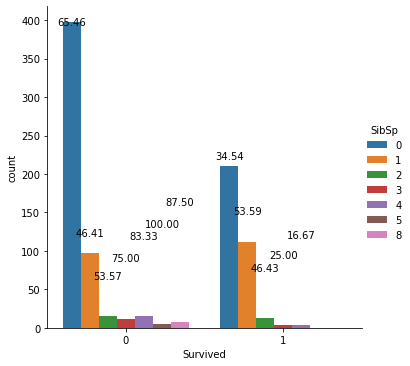

In [47]:
import math

g = sns.catplot('Survived', data=dataset, kind='count', hue='SibSp')

counts = [608, 608, 209, 209, 28, 28, 16, 16, 18, 18, 5, 5, 8, 8]

for ax in g.axes.ravel():
    c = -1
    for p in ax.patches:
        c += 1
        ax.annotate(format((p.get_height()/counts[c]) * 100, '.2f'), (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center', xytext = (0, 10*c), 
            textcoords = 'offset points')

#### let's check on Parch(#of parents/Children)

<AxesSubplot:xlabel='Parch', ylabel='Density'>

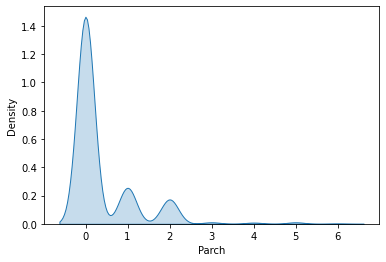

In [48]:
sns.kdeplot(dataset['Parch'], shade=True)

 > Parch and the SibSp density graphs seems identical

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


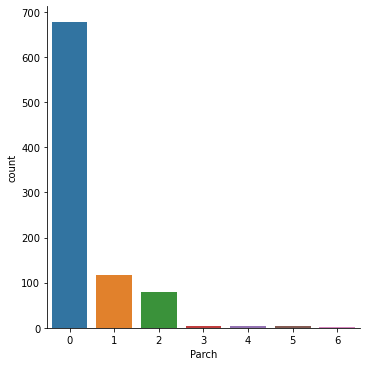

In [49]:
print(dataset['Parch'].value_counts())

sns.catplot('Parch', data=dataset, kind='count')

> Majority didn't have parents or childrens

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


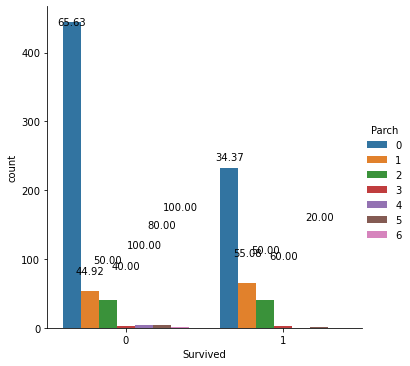

In [50]:
g = sns.catplot('Survived', data=dataset, kind='count', hue='Parch')

counts = [678, 678, 118, 118, 80, 80, 5, 5, 4, 4, 5, 5, 1, 1]

for ax in g.axes.ravel():
    c = -1
    for p in ax.patches:
        c += 1
        ax.annotate(format((p.get_height()/counts[c]) * 100, '.2f'), (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center', xytext = (0, 10*c), 
            textcoords = 'offset points')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


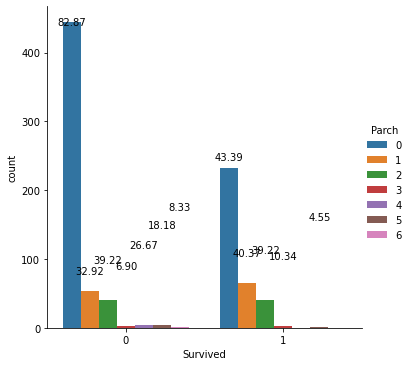

In [51]:
g = sns.catplot('Survived', data=dataset, kind='count', hue='Parch')

counts = [537, 537, 161, 161, 102, 102, 29, 29, 15, 15, 22, 22, 12, 12, 6, 6, 7, 7]


for ax in g.axes.ravel():
    c = -1
    for p in ax.patches:
        c += 1
        ax.annotate(format((p.get_height()/counts[c]) * 100, '.2f'), (p.get_x() + p.get_width() / 2.,
            p.get_height()), ha = 'center', va = 'center', xytext = (0, 10*c), 
            textcoords = 'offset points')

# 3.0 Feature Engineering - Part I

**From `Name` create `Title, Nme_Length` feature** 
> Name got details about the status of the passenger that can be usefull for predicting the `Age`

Resultant titles:

```
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
the Countess      1
Lady              1
Sir               1
Ms                1
Don               1
Mme               1
Jonkheer          1
Name: Title, dtype: int64
```
> Title Details:


```Mlle          Mademoiselle is a French courtesy title for Miss
Master        Master is a title for an underage male
Rev           Reverend is a title used before the name or rank of an officially appointed religious leader.
Col           Military rank
Major         Military rank
Jonkheer      Jonkheer is an honorific in the Low Countries denoting the lowest rank within the nobility. 
Lady          "Lady" is used before the family name of a woman with a title of nobility or honorary title
Mme            Madam a traditional alternative for an unmarried woman.
Ms            Ms.: Use “Ms.” when you are not sure of a woman's marital status, 
              if the woman is unmarried and over 30 or if she prefers being addressed with a marital-status 
              neutral title.
Sir           Men who receive this honour are given the title Sir(knight)
Don           Spanish title used to refer to a gentleman
the Countess  Most countesses receive their title from being married to an earl (again, in the U.K.) 
              or a count (in other European countries)
Capt          Captain      ```


In [52]:
def handle_name_feature(dataset):
    """ Method to handle duplicate titles and rare titles """
    
    # Get titles
    dataset['Title'] = dataset['Name'].apply(lambda x: x.strip().split(',')[1].strip().split('.')[0])
    
    # Duplicate titles
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Mme', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Don'], 'Mr')
    # Rare titles
    is_rare = (dataset['Title'].value_counts() < 10)
    
    # replace rare title to 'Rare'
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Rare' if is_rare.loc[x] == True else x)
    
    # create name length feature
    dataset['Name_Length'] = dataset['Name'].apply(lambda x: len(x))
    
    # Name column is no longer needed
    del dataset['Name']
    
    return dataset

In [53]:
dataset = handle_name_feature(dataset)

In [54]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,44
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,24


**From `SibSp` and `Parch` create `Family_size` feature**

In [55]:
def create_family_size(dataset):
    """ Method to create Family_size feature """
    
    dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    return dataset

In [56]:
dataset = create_family_size(dataset)

In [57]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Name_Length,Family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,23,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,51,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,22,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,44,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,24,1


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


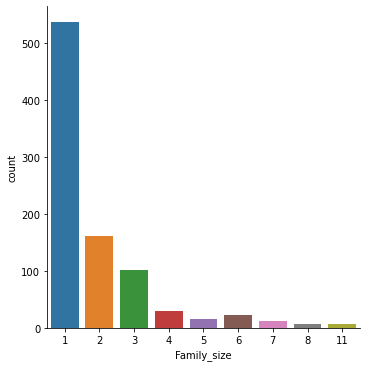

In [58]:
print(dataset['Family_size'].value_counts())

sns.catplot('Family_size', data=dataset, kind='count')

<AxesSubplot:xlabel='Family_size', ylabel='Density'>

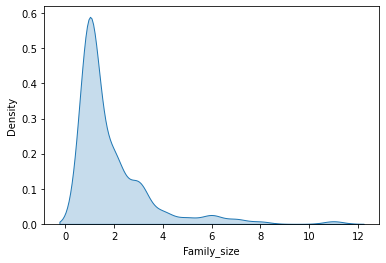

In [59]:
sns.kdeplot(dataset['Family_size'], shade=True)

> Seems family size is more concentrated to 1-4 range

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


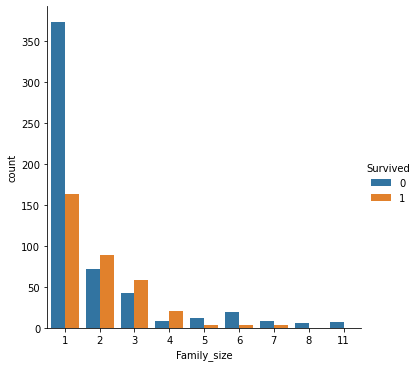

In [60]:
# let's see survival count in each class
sns.catplot('Family_size', data=dataset, hue='Survived', kind='count')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


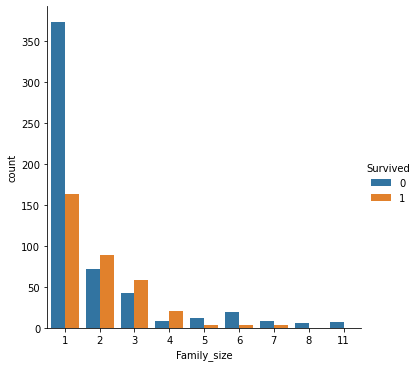

In [61]:
# let's see survival count in each class
sns.catplot('Family_size', data=dataset, hue='Survived', kind='count')

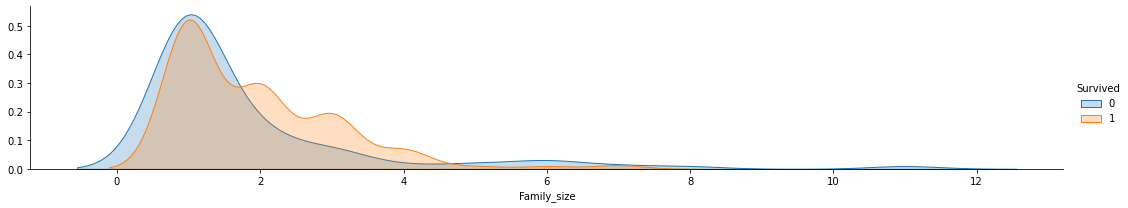

In [62]:
class_wise = sns.FacetGrid(dataset, hue='Survived', aspect=5)
class_wise.map(sns.kdeplot, 'Family_size', shade=True)
class_wise.add_legend()

<AxesSubplot:ylabel='None'>

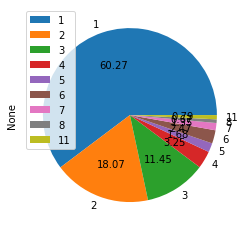

In [63]:
dataset.groupby('Family_size').size().plot(kind='pie', autopct='%.2f', legend=True)

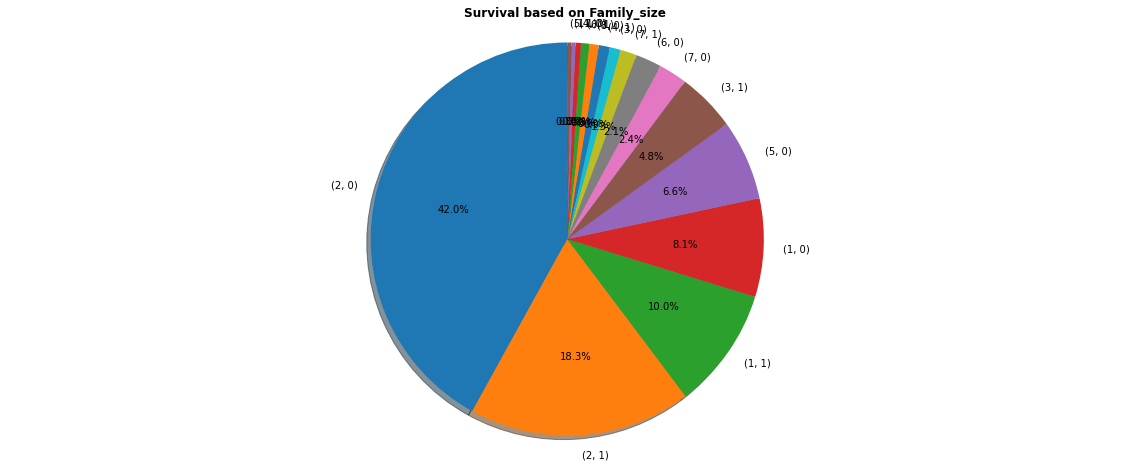

In [64]:
zipped = list(zip(dataset['Family_size'],dataset['Survived']))
zipped = pd.DataFrame([zipped])
zipped = zipped.T

labels = zipped[0].unique()
values = zipped[0].value_counts()

fig, ax = plt.subplots(1,figsize=(20,8))
ax.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.title('Survival based on Family_size',fontweight='bold')
plt.show()

**Create `Is_Cabin_Missing` feature**

In [65]:
def create_is_cabin_missing(dataset):
    """ Method to create Is_Cabin_Missing feature """
    
    # create new feature
    dataset['Is_Cabin_Missing'] = dataset['Cabin'].isnull().astype(int)
    # drop Cabin feature
    del dataset['Cabin']
    
    return dataset

In [66]:
create_is_cabin_missing(dataset)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Name_Length,Family_size,Is_Cabin_Missing
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,23,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,51,2,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,22,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,44,2,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Mr,24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S,Rare,21,1,1
887,888,1,1,female,19.0,0,0,112053,30.0000,S,Miss,28,1,0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,Miss,40,4,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C,Mr,21,1,0


# 4.0 Data Preprocessing

## 4.1 Handling Missing Values

**Unique identifier elimination**

In [67]:
del dataset['PassengerId']

**More than 20% of data missing from `Cabin` feature**
> This feature is droped after creating `Is_Cabin_Missing` feature

**Got too much categorical variable currently has no worth in `Ticket` feature**

In [68]:
del dataset['Ticket']

**`Embarked` only got two missing values**

In [69]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].value_counts().idxmax())

# 4.2 Feature Encoding

### 4.2.1 Hot End Encoding

In [70]:
from sklearn import preprocessing 
from sklearn.compose import ColumnTransformer

In [71]:
onehot_encoder = preprocessing.OneHotEncoder(drop='first')

In [72]:
# OneHotEncoding for nominal columns
def clean_nominal(dataset, columns_nominal):
    """ Method to OneHot Encode columns in dataset selectively"""
    cleaned_dataset = dataset

    for column in columns_nominal:
        X = onehot_encoder.fit_transform(dataset[column].values.reshape(-1, 1)).toarray()
        # create dataframe from encoded data
        dataset_onehot = pd.DataFrame(X, columns = [column + '_' + str(i) for i in range(X.shape[1])]) 
        # update dataset -> cleaned_dataset
        cleaned_dataset = pd.concat(
            [dataset_onehot.reset_index(drop=True), cleaned_dataset.reset_index(drop=True)],
            axis=1)
        # remove encoded column from dataset
        del cleaned_dataset[column]
    return cleaned_dataset

### 4.2.2 Label Encoding

In [73]:
label_encoder = preprocessing.LabelEncoder()

In [74]:
# Label Encoding for ordinal columns
def clean_ordinal(dataset, columns_ordinal):
    """ Method to Label Encode columns in dataset selectively"""
    for column in columns_ordinal:
        dataset[column] = label_encoder.fit_transform(dataset[column])
    return dataset

In [75]:
cleaned_dataset = clean_nominal(dataset, ['Family_size', 'Is_Cabin_Missing','Sex', 'Embarked', 'Title', 'Pclass'])
cleaned_dataset.head()

,Pclass_0,Pclass_1,Title_0,Title_1,Title_2,Title_3,Embarked_0,Embarked_1,Sex_0,Is_Cabin_Missing_0,...,Family_size_4,Family_size_5,Family_size_6,Family_size_7,Survived,Age,SibSp,Parch,Fare,Name_Length
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0,22.0,1,0,7.2500,23
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,38.0,1,0,71.2833,51
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,26.0,0,0,7.9250,22
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,35.0,1,0,53.1000,44
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0,35.0,0,0,8.0500,24


In [76]:
# cleaned_dataset = clean_ordinal(cleaned_dataset, ['Sex'])

### 4.3.1 Data Imputation (using datawig)

### Using Datawig
> pip install datawig

In [77]:
import datawig
from sklearn.metrics import r2_score

In [78]:
corr = cleaned_dataset.corr()

<AxesSubplot:>

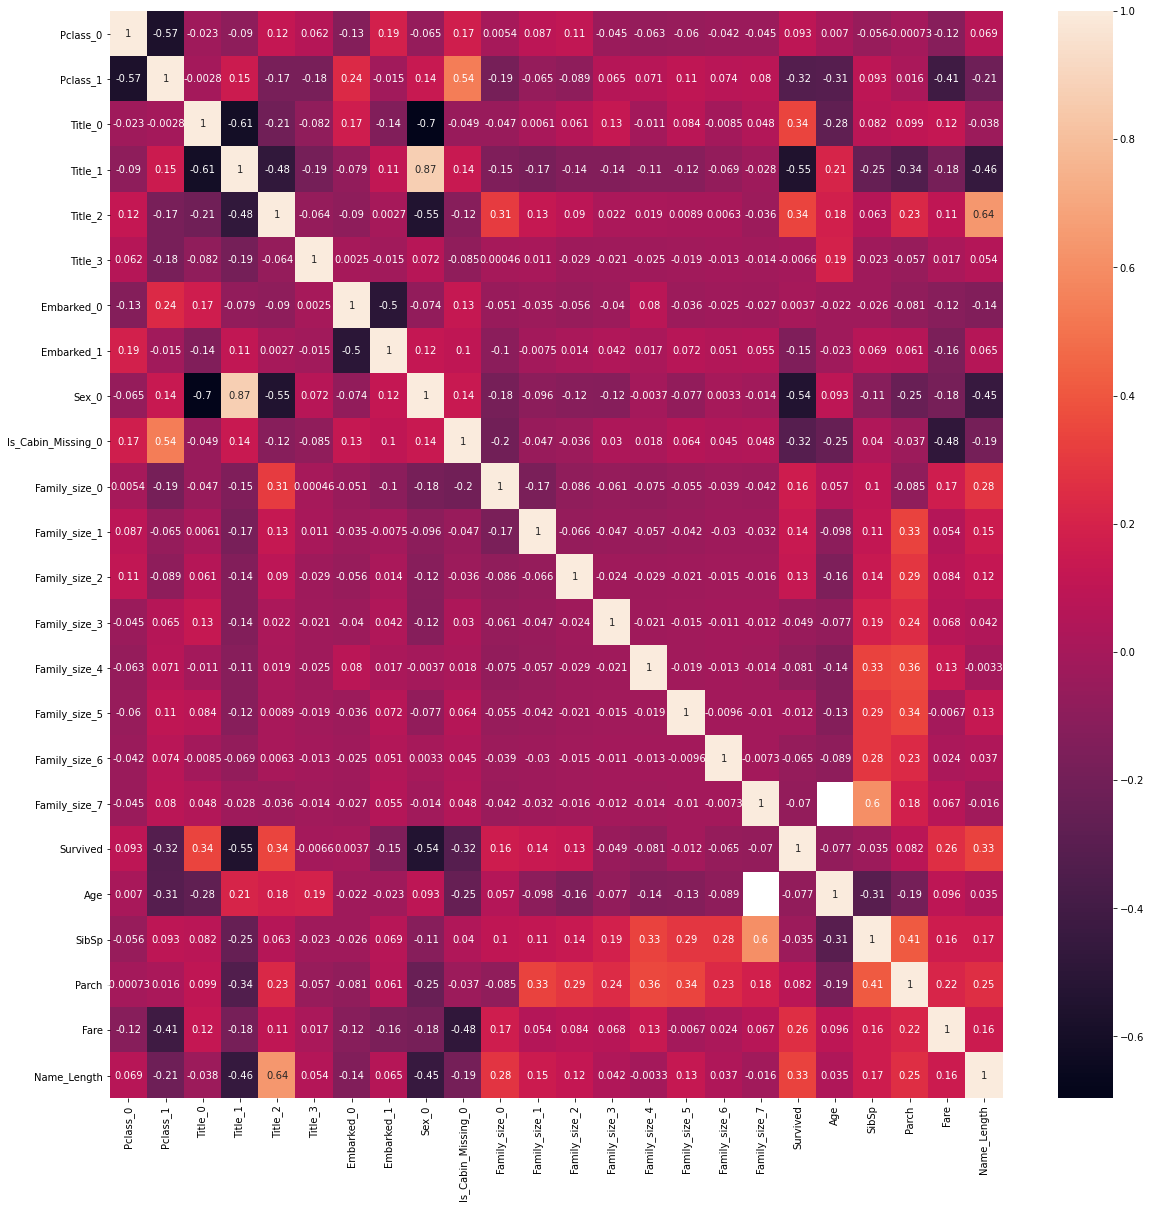

In [79]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

> `Age` is considerably corelated with `Family_size`, `Parch`, `SibSp`, `Pclass`, `Title_3`, `Title_2`, `Title_1`, `Title_0`

In [80]:
def get_r2_score(imputed_dataset, column):
    """ 
        Get R2 score for imputed dataset
        param:
            imputed_dataset: Dataset with separate imputed column generated by DataWig
            column: Column that needs imputation
    """
    
    # make a copy of dataset
    imputed_dataset_cpy = imputed_dataset.copy()
    # drop null values
    imputed_dataset_cpy.dropna(how='any', axis=0, inplace=True)
    print('Accuracy(using R2 score): {}'.format(r2_score(imputed_dataset_cpy[column], imputed_dataset_cpy['{}_imputed'.format(column)])))

In [81]:
def get_imputed(dataset, input_columns, output_column):
    """ 
        Method for imputation of a column selectively
        
        param:
            dataset: Dataset that need to be imputed
            input_columns: Columns that need to predict the imputatations
            output_column: Column that needs imputation
    """
    
    # df_train, df_test = datawig.utils.random_split(dataset)

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=input_columns, # column(s) containing information about the column we want to impute
        output_column=output_column, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    #Fit an imputer model on the train data
    imputer.fit(train_df=dataset, # used whole dataset
                    num_epochs=500,
                   )

    #Impute missing values and return original dataframe with predictions
    imputed_dataset = imputer.predict(dataset)
    
    get_r2_score(imputed_dataset, output_column)
    
    # fill null field of imputation needed column with imputed data
    imputed_dataset[output_column] = imputed_dataset[output_column].fillna(imputed_dataset['{}_imputed'.format(output_column)])
    # remove imputation prediction column
    del imputed_dataset['{}_imputed'.format(output_column)]
    return imputed_dataset

In [82]:
def get_corr_columns(dataset, column, min_corr=0.095):
    """
        Method to get considerable corelated features for a given column
        param:
            dataset: Dataset that needs corelation matrix
            column: Feature that need corelations
            min_corr: minimum corelation index
        return: corelated column list
    """
    
    # Create correlation matrix
    corr_matrix = dataset.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    max_corelated = [column for column in upper.columns if any(upper[column] > min_corr)]
    print(max_corelated)
    # remove imputation wanted column
    try:
        max_corelated.remove(column)
    except:
        pass
    
    print('Corelated columns of {}: {}'.format(column, max_corelated))
    
    return max_corelated

In [83]:
corelated_columns = get_corr_columns(cleaned_dataset, 'Age')
imputed_dataset = get_imputed(cleaned_dataset, 
                              corelated_columns,
                              'Age')


['Pclass_1', 'Title_1', 'Title_2', 'Title_3', 'Embarked_0', 'Embarked_1', 'Sex_0', 'Is_Cabin_Missing_0', 'Family_size_0', 'Family_size_1', 'Family_size_2', 'Family_size_3', 'Family_size_4', 'Family_size_5', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Length']
Corelated columns of Age: ['Pclass_1', 'Title_1', 'Title_2', 'Title_3', 'Embarked_0', 'Embarked_1', 'Sex_0', 'Is_Cabin_Missing_0', 'Family_size_0', 'Family_size_1', 'Family_size_2', 'Family_size_3', 'Family_size_4', 'Family_size_5', 'Survived', 'SibSp', 'Parch', 'Fare', 'Name_Length']


2021-07-29 17:48:48,261 [INFO]  
========== start: fit model
2021-07-29 17:48:48,262 [WARNING]  Already bound, ignoring bind()
2021-07-29 17:48:48,296 [INFO]  Epoch[0] Batch [0-26]	Speed: 21964.13 samples/sec	cross-entropy=14.365096	Age-accuracy=0.000000
2021-07-29 17:48:48,315 [INFO]  Epoch[0] Train-cross-entropy=13.155486
2021-07-29 17:48:48,316 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2021-07-29 17:48:48,317 [INFO]  Epoch[0] Time cost=0.052
2021-07-29 17:48:48,322 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2021-07-29 17:48:48,327 [INFO]  Epoch[0] Validation-cross-entropy=12.585168
2021-07-29 17:48:48,328 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2021-07-29 17:48:48,350 [INFO]  Epoch[1] Batch [0-26]	Speed: 19875.27 samples/sec	cross-entropy=11.924667	Age-accuracy=0.000000
2021-07-29 17:48:48,373 [INFO]  Epoch[1] Train-cross-entropy=11.367238
2021-07-29 17:48:48,374 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2021-07-29 17:48:48,375 [INFO]  Epoch[1] Tim

2021-07-29 17:48:49,152 [INFO]  Epoch[14] Train-Age-accuracy=0.000000
2021-07-29 17:48:49,153 [INFO]  Epoch[14] Time cost=0.043
2021-07-29 17:48:49,157 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2021-07-29 17:48:49,160 [INFO]  Epoch[14] Validation-cross-entropy=11.277120
2021-07-29 17:48:49,161 [INFO]  Epoch[14] Validation-Age-accuracy=0.000000
2021-07-29 17:48:49,183 [INFO]  Epoch[15] Batch [0-26]	Speed: 21974.64 samples/sec	cross-entropy=9.688557	Age-accuracy=0.000000
2021-07-29 17:48:49,202 [INFO]  Epoch[15] Train-cross-entropy=9.365296
2021-07-29 17:48:49,203 [INFO]  Epoch[15] Train-Age-accuracy=0.000000
2021-07-29 17:48:49,204 [INFO]  Epoch[15] Time cost=0.042
2021-07-29 17:48:49,207 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2021-07-29 17:48:49,210 [INFO]  Epoch[15] Validation-cross-entropy=11.308456
2021-07-29 17:48:49,211 [INFO]  Epoch[15] Validation-Age-accuracy=0.000000
2021-07-29 17:48:49,234 [INFO]  Epoch[16] Batch [0-26]	Speed: 19875.9

Accuracy(using R2 score): 0.5018238790804679


In [84]:
imputed_dataset.isna().any()

Pclass_0              False
Pclass_1              False
Title_0               False
Title_1               False
Title_2               False
Title_3               False
Embarked_0            False
Embarked_1            False
Sex_0                 False
Is_Cabin_Missing_0    False
Family_size_0         False
Family_size_1         False
Family_size_2         False
Family_size_3         False
Family_size_4         False
Family_size_5         False
Family_size_6         False
Family_size_7         False
Survived              False
Age                   False
SibSp                 False
Parch                 False
Fare                  False
Name_Length           False
dtype: bool

In [85]:
imputed_dataset.shape

(891, 24)

## 4.4 Feature Engineering - Part II

**Let's cut `Age` into groups**

In [86]:
def create_age_to_range(dataset):
    """ Converts Age and Fare columns to ranged format """
    
    bins = [0, 13, 20, 30, 45, 65, 150]
    labels = ['Child', 'Teen', 'Adult', 'Middle Aged', 'Old', 'Very old']
    
    dataset['Age'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
    
    dataset = clean_ordinal(dataset, ['Age'])
    print('after ranges', dataset.shape)
    dataset = clean_nominal(dataset, ['Age'])
    print('clean nominal', dataset.shape)
    return dataset

In [87]:
imputed_dataset = create_age_to_range(imputed_dataset)

after ranges (891, 24)
clean nominal (891, 28)


In [88]:
imputed_dataset.shape

(891, 28)

In [89]:
imputed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
Age_0                 891 non-null float64
Age_1                 891 non-null float64
Age_2                 891 non-null float64
Age_3                 891 non-null float64
Age_4                 891 non-null float64
Pclass_0              891 non-null float64
Pclass_1              891 non-null float64
Title_0               891 non-null float64
Title_1               891 non-null float64
Title_2               891 non-null float64
Title_3               891 non-null float64
Embarked_0            891 non-null float64
Embarked_1            891 non-null float64
Sex_0                 891 non-null float64
Is_Cabin_Missing_0    891 non-null float64
Family_size_0         891 non-null float64
Family_size_1         891 non-null float64
Family_size_2         891 non-null float64
Family_size_3         891 non-null float64
Family_size_4         891 non-null float64
Family_size_5         891 non-null 

# 5.0 Independant dependant var splitting

In [90]:
x = imputed_dataset.loc[:, imputed_dataset.columns != 'Survived']
y = imputed_dataset['Survived']

# 6.0 Train Test Set Splitting

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# 6.0 Standerdizing

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [94]:
scaler = StandardScaler()

In [95]:
""" Selectively applies transformations to a specific column """
x_train[['Fare', 'Name_Length']] = scaler.fit_transform(x_train[['Fare', 'Name_Length']])
x_test[['Fare','Name_Length']] = scaler.fit_transform(x_test[['Fare', 'Name_Length']])

# scaling complete x for complete training on train set
x[['Fare', 'Name_Length']] = scaler.fit_transform(x[['Fare', 'Name_Length']])



<ipython-input-95-5e6b39d72dd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['Fare', 'Name_Length']] = scaler.fit_transform(x_train[['Fare', 'Name_Length']])
C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-95-5e6b39d72dd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

# 7.0 Model(Random Forest)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 7.1 Hyper parameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { 
    "criterion" : ["gini", "entropy"],
    "min_samples_leaf" : [1, 2, 4, 8], 
    "min_samples_split" : [2, 4, 10, 12, 16, 20],
    "n_estimators": [50, 100, 200, 400, 700, 1000],
}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

gs = gs.fit(x, y)

In [105]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.cv_results_)

# 0.837278401997503
# tuned_params: {'criterion': 'entropy',
#  'min_samples_leaf': 1, 
#  'min_samples_split': 10,
#  'n_estimators': 50}

0.837278401997503
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
{'mean_fit_time': array([0.20501392, 0.43594053, 0.8734762 , 1.79449327, 3.78174195,
       5.37700136, 0.25674057, 0.53710229, 0.9484252 , 2.15678093,
       3.68606133, 4.97983091, 0.22175756, 0.43763566, 0.82553596,
       1.80545659, 3.37819216, 4.81269064, 0.21866779, 0.46524351,
       0.95589988, 1.8596751 , 3.74934964, 5.09454701, 0.24886742,
       0.54816523, 1.01779292, 2.08581438, 3.61941781, 4.80352137,
       0.24936514, 0.42398078, 0.79374316, 1.77774928, 3.62267375,
       4.78368754, 0.22574439, 0.44710336, 0.8352042 , 1.85220006,
       3.32078409, 4.63299205, 0.215379  , 0.46095693, 0.77650056,
       1.83037293, 3.10709949, 4.61724448, 0.20959828, 0.47112272,
       0.82693193, 1.75941062, 3.03045611, 4.74083087, 0.2493654 ,
       0.48238525, 0.79743066, 1.76289907, 3.04082112, 4.66099803,
       0.20222316, 0.4442131 , 0.82613482, 1.74784942, 3.25420718,


## 7.2 Model Creation

In [106]:
def create_classifier(**kwargs):
    rf = RandomForestClassifier(
        criterion=kwargs['criterion'],
        min_samples_leaf=kwargs['min_samples_leaf'],
        min_samples_split=kwargs['min_samples_split'],
        n_estimators=kwargs['n_estimators'])
    
    return rf

In [107]:
classifier = create_classifier(**gs.best_params_)

In [108]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
y_pred = classifier.predict(x_test)

In [110]:
from sklearn import metrics
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Random Forest model accuracy(in %): 83.5820895522388


Accuracy: 0.835820895522388


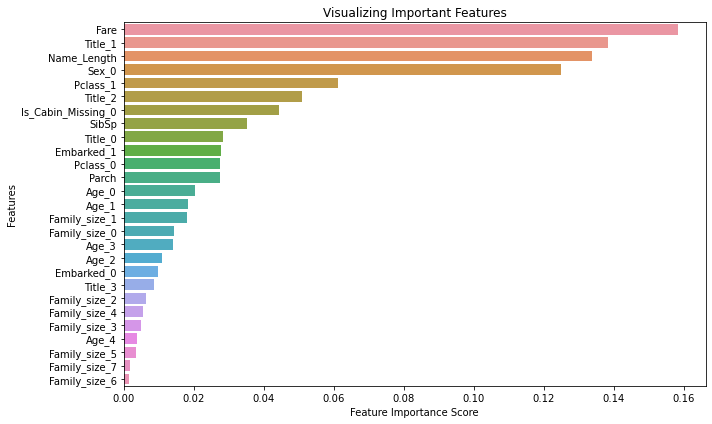

In [111]:
feature_imp = pd.Series(classifier.feature_importances_, index=x_train.columns).sort_values(ascending=False)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

# 8.0 Validation

## 8.1 K Fold

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
cv_score = cross_val_score(classifier, x, y, cv=10)
cv_score

array([0.8       , 0.85393258, 0.74157303, 0.82022472, 0.86516854,
       0.84269663, 0.82022472, 0.78651685, 0.87640449, 0.83146067])

In [114]:
print('K-Fold CV accuracy: {}'.format(sum(cv_score)/len(cv_score)))

K-Fold CV accuracy: 0.8238202247191012


## 8.2 confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [116]:
predict_class = classifier.predict(x_test)
predict_class = (predict_class> 0.5)

In [117]:
cm = confusion_matrix(y_test, y_pred)

In [118]:
cm

array([[141,  16],
       [ 28,  83]], dtype=int64)

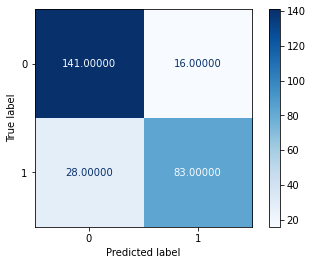

In [119]:
plot_confusion_matrix(
    classifier,
    x_test,
    y_test,
    cmap=plt.cm.Blues,
    values_format = '.5f')
plt.show()

## 8.3 Classification report

In [120]:
from sklearn.metrics import classification_report

In [121]:
print(classification_report(y_test, predict_class))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       157
           1       0.84      0.75      0.79       111

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.83       268



## 8.4 ROC AUC Analysis

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [123]:
y_pred_proba = classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

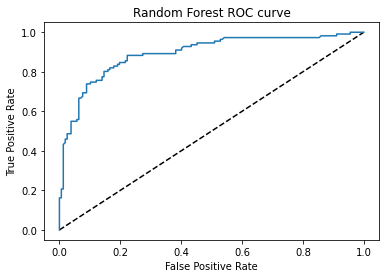

In [124]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [125]:
from sklearn.metrics import roc_auc_score

print('ROC Score: {}'.format(roc_auc_score(y_test,y_pred_proba)))

ROC Score: 0.8919779652263728


## 8.5 Precission-Recall Curves

In [126]:
def plot_precision_recall_curve(precision, recall, threshold):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(recall, precision, label='Classifier')
    baseline = len(y_test[y_test==1]) / len(y_test)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc='center left');
    plt.show()

In [127]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

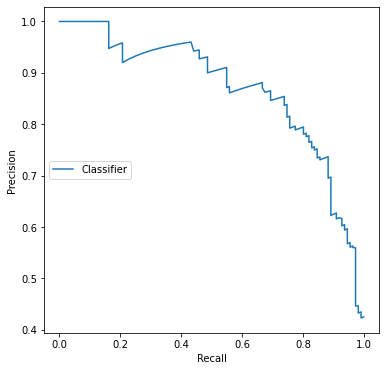

In [128]:
plot_precision_recall_curve(precision, recall, threshold)

# 9.0 Test Set Cleaning

In [129]:
test_set = pd.read_csv(os.path.join(cwd, 'datasets/test.csv'))
df = pd.read_csv(os.path.join(cwd, 'datasets/train.csv'))

test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [130]:
test_set.head(50)

del df['PassengerId']
del df['Survived']

df.isna().any()

df = df.fillna(df.median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())
df.isna().any()

# Lets add Column so we can identify the test set after concat
df['Train'] = 0
test_set['Train'] = 1

# Age, Fare, Cabin have null values in test set
concat_dataset = pd.concat([df, test_set], sort=False, ignore_index=True)

# Creating Family_size column
concat_dataset['Family_size'] = concat_dataset['SibSp'] + concat_dataset['Parch'] + 1

# Handling Name
test_set = handle_name_feature(test_set)
concat_dataset = handle_name_feature(concat_dataset)

concat_dataset.head()

# how many are there in each title?
print(test_set['Title'].value_counts())
print(concat_dataset['Title'].value_counts())

# Create Is_Cabin_Missing feature
cleaned_concat_dataset = create_is_cabin_missing(concat_dataset)

cleaned_concat_dataset = clean_nominal(concat_dataset,['Family_size', 'Is_Cabin_Missing','Sex', 'Embarked', 'Title', 'Pclass'])
# cleaned_concat_dataset = clean_ordinal(cleaned_concat_dataset, ['Sex'])

# Lets select only the test set
cleaned_test_set = cleaned_concat_dataset[cleaned_concat_dataset['Train'] == 1]

# Remove unnecessary features
del cleaned_test_set['Ticket']
del cleaned_test_set['Train']


# Imputing Age column in Test set
imputed_test_set = get_imputed(cleaned_test_set, 
                          get_corr_columns(cleaned_test_set, 'Age'),
                          'Age')

# Imputing Age column in Test set
imputed_test_set = get_imputed(imputed_test_set,
                               get_corr_columns(cleaned_test_set, 'Fare'),
                               'Fare')    

imputed_test_set.isna().any()

# Age column into age ranges
imputed_test_set = create_age_to_range(imputed_test_set)

# standardizing Fare
imputed_test_set[['Fare', 'Name_Length']] = scaler.fit_transform(imputed_test_set[['Fare', 'Name_Length']])

# fully trained classifier
classifier = create_classifier(**gs.best_params_)

classifier.fit(x, y)

#### Predictions
imputed_test_set['Survived'] = classifier.predict(imputed_test_set.loc[:, imputed_test_set.columns != 'PassengerId'])

# convert PassengerId to int
imputed_test_set['PassengerId'] = imputed_test_set['PassengerId'].astype('Int32')


imputed_test_set.to_csv('predicted_csv/random_forest_pred.csv', columns=['PassengerId', 'Survived'], index=False)

sub = pd.read_csv(os.path.join(cwd, 'predicted_csv/random_forest_pred_final.csv'))

sub.info()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64
Mr        758
Miss      265
Mrs       197
Master     61
Rare       28
Name: Title, dtype: int64
['Pclass_1', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Embarked_0', 'Embarked_1', 'Sex_0', 'Is_Cabin_Missing_0', 'Family_size_0', 'Family_size_1', 'Family_size_2', 'Family_size_4', 'Age', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Name_Length']
Corelated columns of Age: ['Pclass_1', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Embarked_0', 'Embarked_1', 'Sex_0', 'Is_Cabin_Missing_0', 'Family_size_0', 'Family_size_1', 'Family_size_2', 'Family_size_4', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Name_Length']
Accuracy(using R2 score): 0.5953589723622357
['Pclass_1', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Embarked_0', 'Embarked_1', 'Sex_0', 'Is_Cabin_Missing_0', 'Family_size_0', 'Family_size_1', 'Family_size_2', 'Family_size_4', 'Age', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Name_Length']
Cor

C:\Users\ACER\anaconda3\lib\site-packages\datawig\calibration.py:92: RuntimeWarning: invalid value encountered in log
  return np.log(probas)


Accuracy(using R2 score): 0.6430999694625067
after ranges (418, 24)
clean nominal (418, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
imputed_test_set.head()

In [3]:
import cv2
import numpy as np

In [17]:
size = 64
test_img =  cv2.imread('C:/Users/ACER/Desktop/plane.png', cv2.IMREAD_GRAYSCALE)
test_img = cv2.resize(test_img, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
thresh = 250
import sys
test_img = cv2.threshold(test_img, thresh, 255, cv2.THRESH_BINARY)[1]
test_img = test_img.reshape((1, size, size, 1)).astype(np.float32)
print(test_img)


[[[[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  ...

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]

  [[255.]
   [255.]
   [255.]
   ...
   [255.]
   [255.]
   [255.]]]]
